In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
num_paths = 10240
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
config = get_config()

In [3]:
def get_drift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDims/"
    true_files = []
    local_files = []
    for file in os.listdir(root_nadaraya_dir):
        print(file)
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [4]:
true_files, local_files, bws = get_drift_files(config=config, root_dir=root_dir)
local_files

IIDNadaraya_fBiPot_12DDims_DriftTrack_0000282bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy
.IIDNadaraya_fBiPot_12DDims_DriftEvalExp_0740266bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy.MqWtYB
IIDNadaraya_fBiPot_12DDims_DriftEvalExp_0003401bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy
IIDNadaraya_fBiPot_12DDims_DriftEvalExp_0012471bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy
IIDNadaraya_fBiPot_12DDims_DriftEvalExp_0031549bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy
IIDNadaraya_fBiPot_12DDims_DriftEvalExp_024306bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy
IIDNadaraya_fBiPot_12DDims_DriftEvalExp_0740266bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy
IIDNadaraya_fBiPot_12DDims_DriftEvalExp_000064bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy
IIDNadaraya_fBiPot_12DDims_DriftEvalExp_0424181bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_isdriftHats.npy
IIDNadaraya_fBiPot_12D

['/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/12DDims/IIDNadaraya_fBiPot_12DDims_DriftTrack_0000282bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/12DDims/IIDNadaraya_fBiPot_12DDims_DriftTrack_0000372bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/12DDims/IIDNadaraya_fBiPot_12DDims_DriftTrack_0000491bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/12DDims/IIDNadaraya_fBiPot_12DDims_DriftTrack_0000649bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_39343/2094698121.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_39343/2094698121.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


11.393487112513055 1e-05 inf


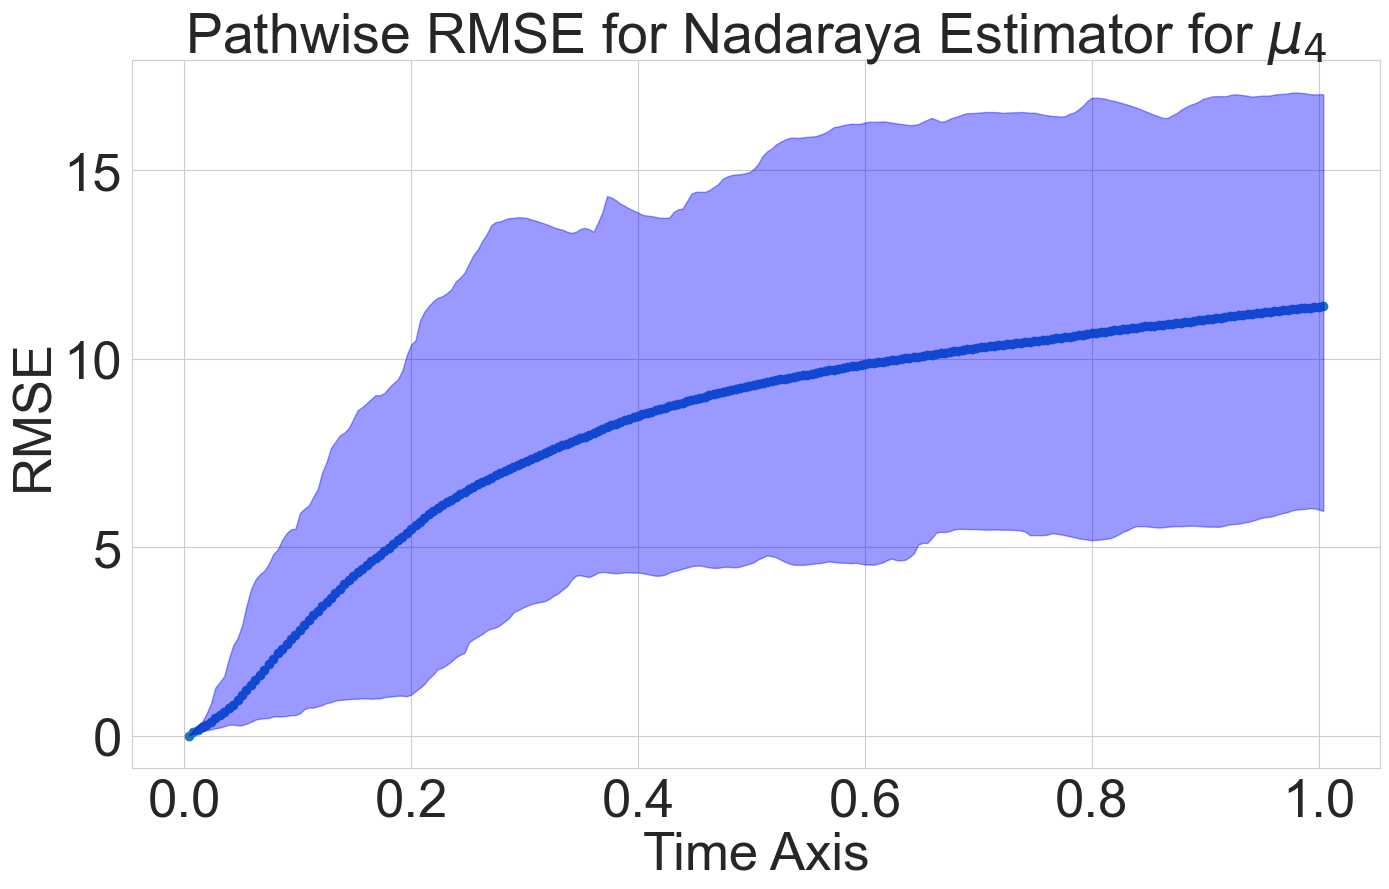

11.392872880468746 1.2e-05 11.393487112513055


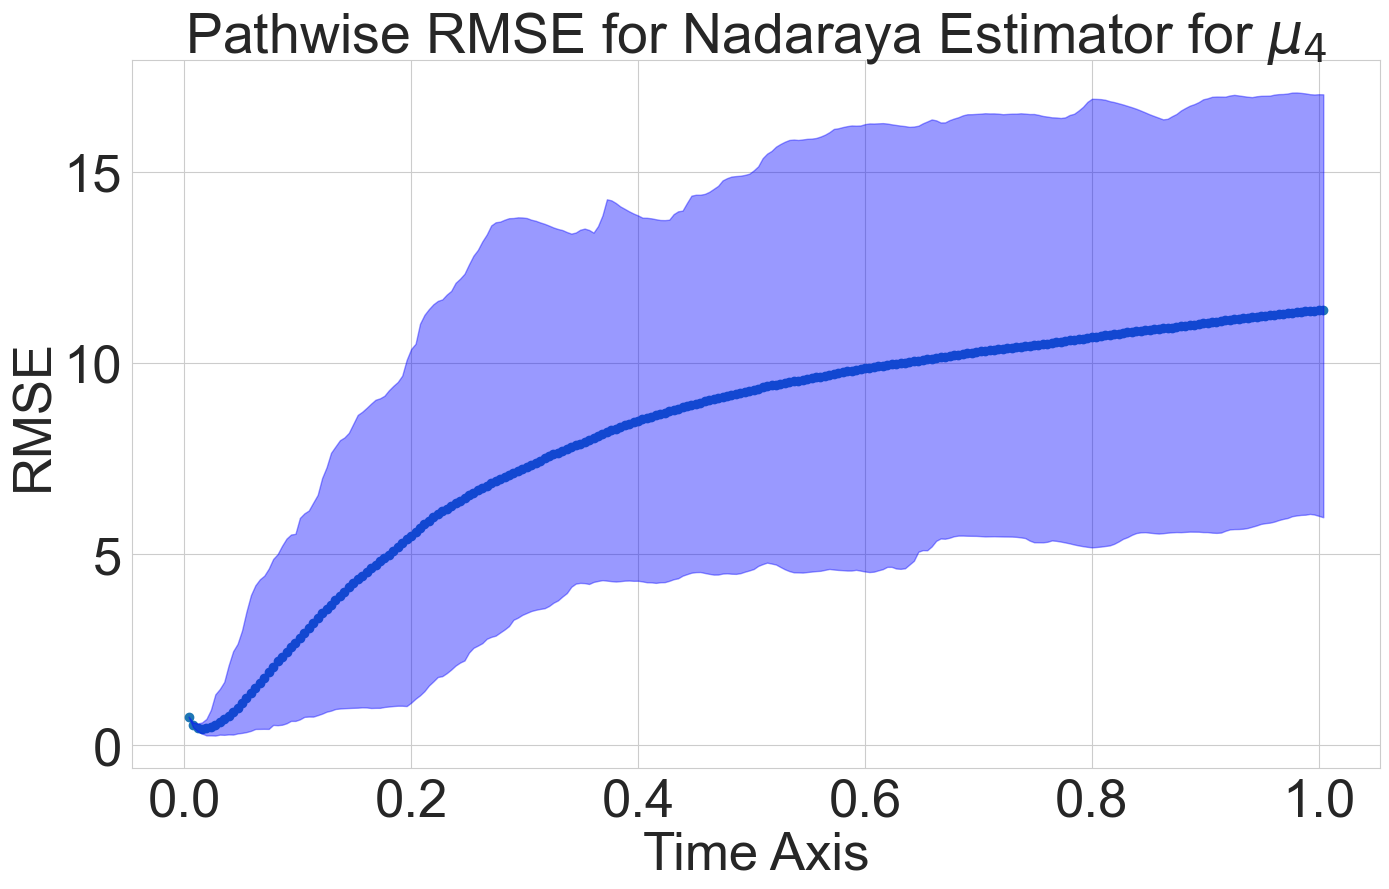

11.393371867161948 1.45e-05 11.392872880468746
11.393678145040033 1.75e-05 11.392872880468746
11.393596796428852 2.1e-05 11.392872880468746


In [15]:
curr_rmse = np.inf
toSave = True
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_4$",fontsize=40)
            ax.set_ylabel("RMSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/12DDims/IIDNadaraya_fBiPot_{config.ndims}DDims_DriftTrack_{round(bw, 6)}bw_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()

In [6]:
simpaths=all_local_states.reshape(-1, 257, 12)

In [7]:
true_paths=np.load(config.data_path, allow_pickle=True)[:num_paths, :]

In [8]:
markv=np.load("/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/12DDims/TSPM_MLP_ST_0010FTh_fBiPot_12DDims_OOSDriftTrack_496Nep_00t0_3906e-03dT_025a_-20b_00c_10ResLay_2LFac_BetaMax20e+01_global_states.npy", allow_pickle=True).reshape(-1, 257, 12)

In [9]:
markv.shape

(200, 257, 12)

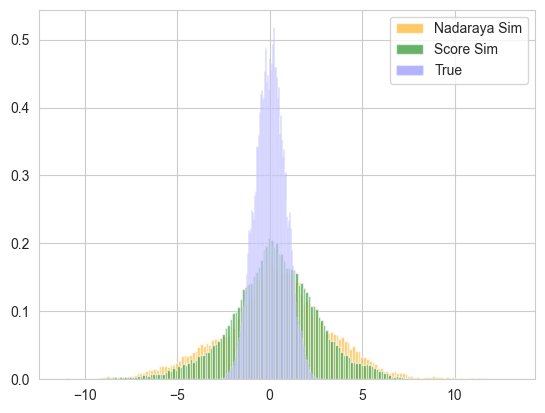

In [10]:
plt.hist(simpaths[:, 1:, 10].flatten(), bins=150, alpha=0.6, density=True, color="orange", label="Nadaraya Sim")
plt.hist(markv[:, 1:, 10].flatten(), bins=150, alpha=0.6, density=True, color="green", label="Score Sim")
plt.hist(true_paths[:, 10].flatten(), bins=150,alpha=0.3,  density=True, color="blue", label="True")
plt.legend()

In [11]:
def get_evalexpdrift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDims/"
    driftevalexp_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "EvalExp" in file and ts_type in file and include in file:
            driftevalexp_files.append(root_nadaraya_dir+file)
    assert len(driftevalexp_files)>0, "No evalexp files found"
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    driftevalexp_files = sorted(driftevalexp_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in driftevalexp_files]
    return driftevalexp_files, bws

In [12]:
eval_exp_files, bws = get_evalexpdrift_files(config=config, root_dir=root_dir)
bws

[1e-05,
 1.2e-05,
 1.45e-05,
 1.75e-05,
 2.1e-05,
 2.53e-05,
 3.05e-05,
 3.67e-05,
 4.41e-05,
 5.32e-05,
 6.4e-05,
 7.7e-05,
 9.28e-05,
 0.0001117,
 0.0001345,
 0.0001619,
 0.0001949,
 0.0002346,
 0.0002825,
 0.0003401,
 0.0004095,
 0.000493,
 0.0005936,
 0.0007146,
 0.0008604,
 0.0010359,
 0.0012471,
 0.0015015,
 0.0018078,
 0.0021765,
 0.0026204,
 0.0031549,
 0.0037983,
 0.004573,
 0.0055057,
 0.0066287,
 0.0079807,
 0.0096084,
 0.0115682,
 0.0139276,
 0.0167683,
 0.0201884,
 0.024306,
 0.0292635,
 0.0352321,
 0.0424181,
 0.0510697,
 0.0614859,
 0.0740266,
 0.0740266,
 0.0891251]

In [13]:
def plot_drift_estimator(mean, mean_min, mean_max, numpy_Xs, true_drift, bw,  toSave: bool = False):
    fig, axes = plt.subplots(6, 2, figsize=(30, 34))
    axes = axes.flatten()  # Flatten to easily index with a single loop
    for d in range(mean.shape[-1]):
        axes[d].scatter(numpy_Xs[:, d], true_drift[:, d], color="red", label="True Drift")
        ymin = mean[:, d] - mean_min[:, d]
        ymax = mean_max[:, d] - mean[:, d]
        ymin[ymin < 0.] = 0.
        ymax[ymax < 0.] = 0.
        axes[d].errorbar(numpy_Xs[:, d], mean[:, d], yerr=[ymin, ymax], xerr=None, fmt='o', color="blue", alpha=0.4)
        axes[d].errorbar(numpy_Xs[:, d], mean[:, d], label="Estimated Drift", color="blue")
        axes[d].set_title(rf"Nadaraya Estimator for $\mu_4$", fontsize=22)
        axes[d].tick_params(labelsize=13)
        axes[d].set_xlabel(f"State $X$ at Dimension {d+1}", fontsize=20)
        axes[d].set_ylabel("Drift Value", fontsize=20)
        axes[d].legend(fontsize=14)
    plt.tight_layout()
    if toSave:
        plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/12DDims/IIDNadaraya_fBiPot_{config.ndims}DDims_DriftEvalExp_{round(bw, 6)}bw").replace(".", "")+".png")
        plt.show()
        plt.close()
        print(f"Final time domain MSE local-time error {total_local_errors[-1]} at bw {bw}\n")
    plt.show()
    plt.close()

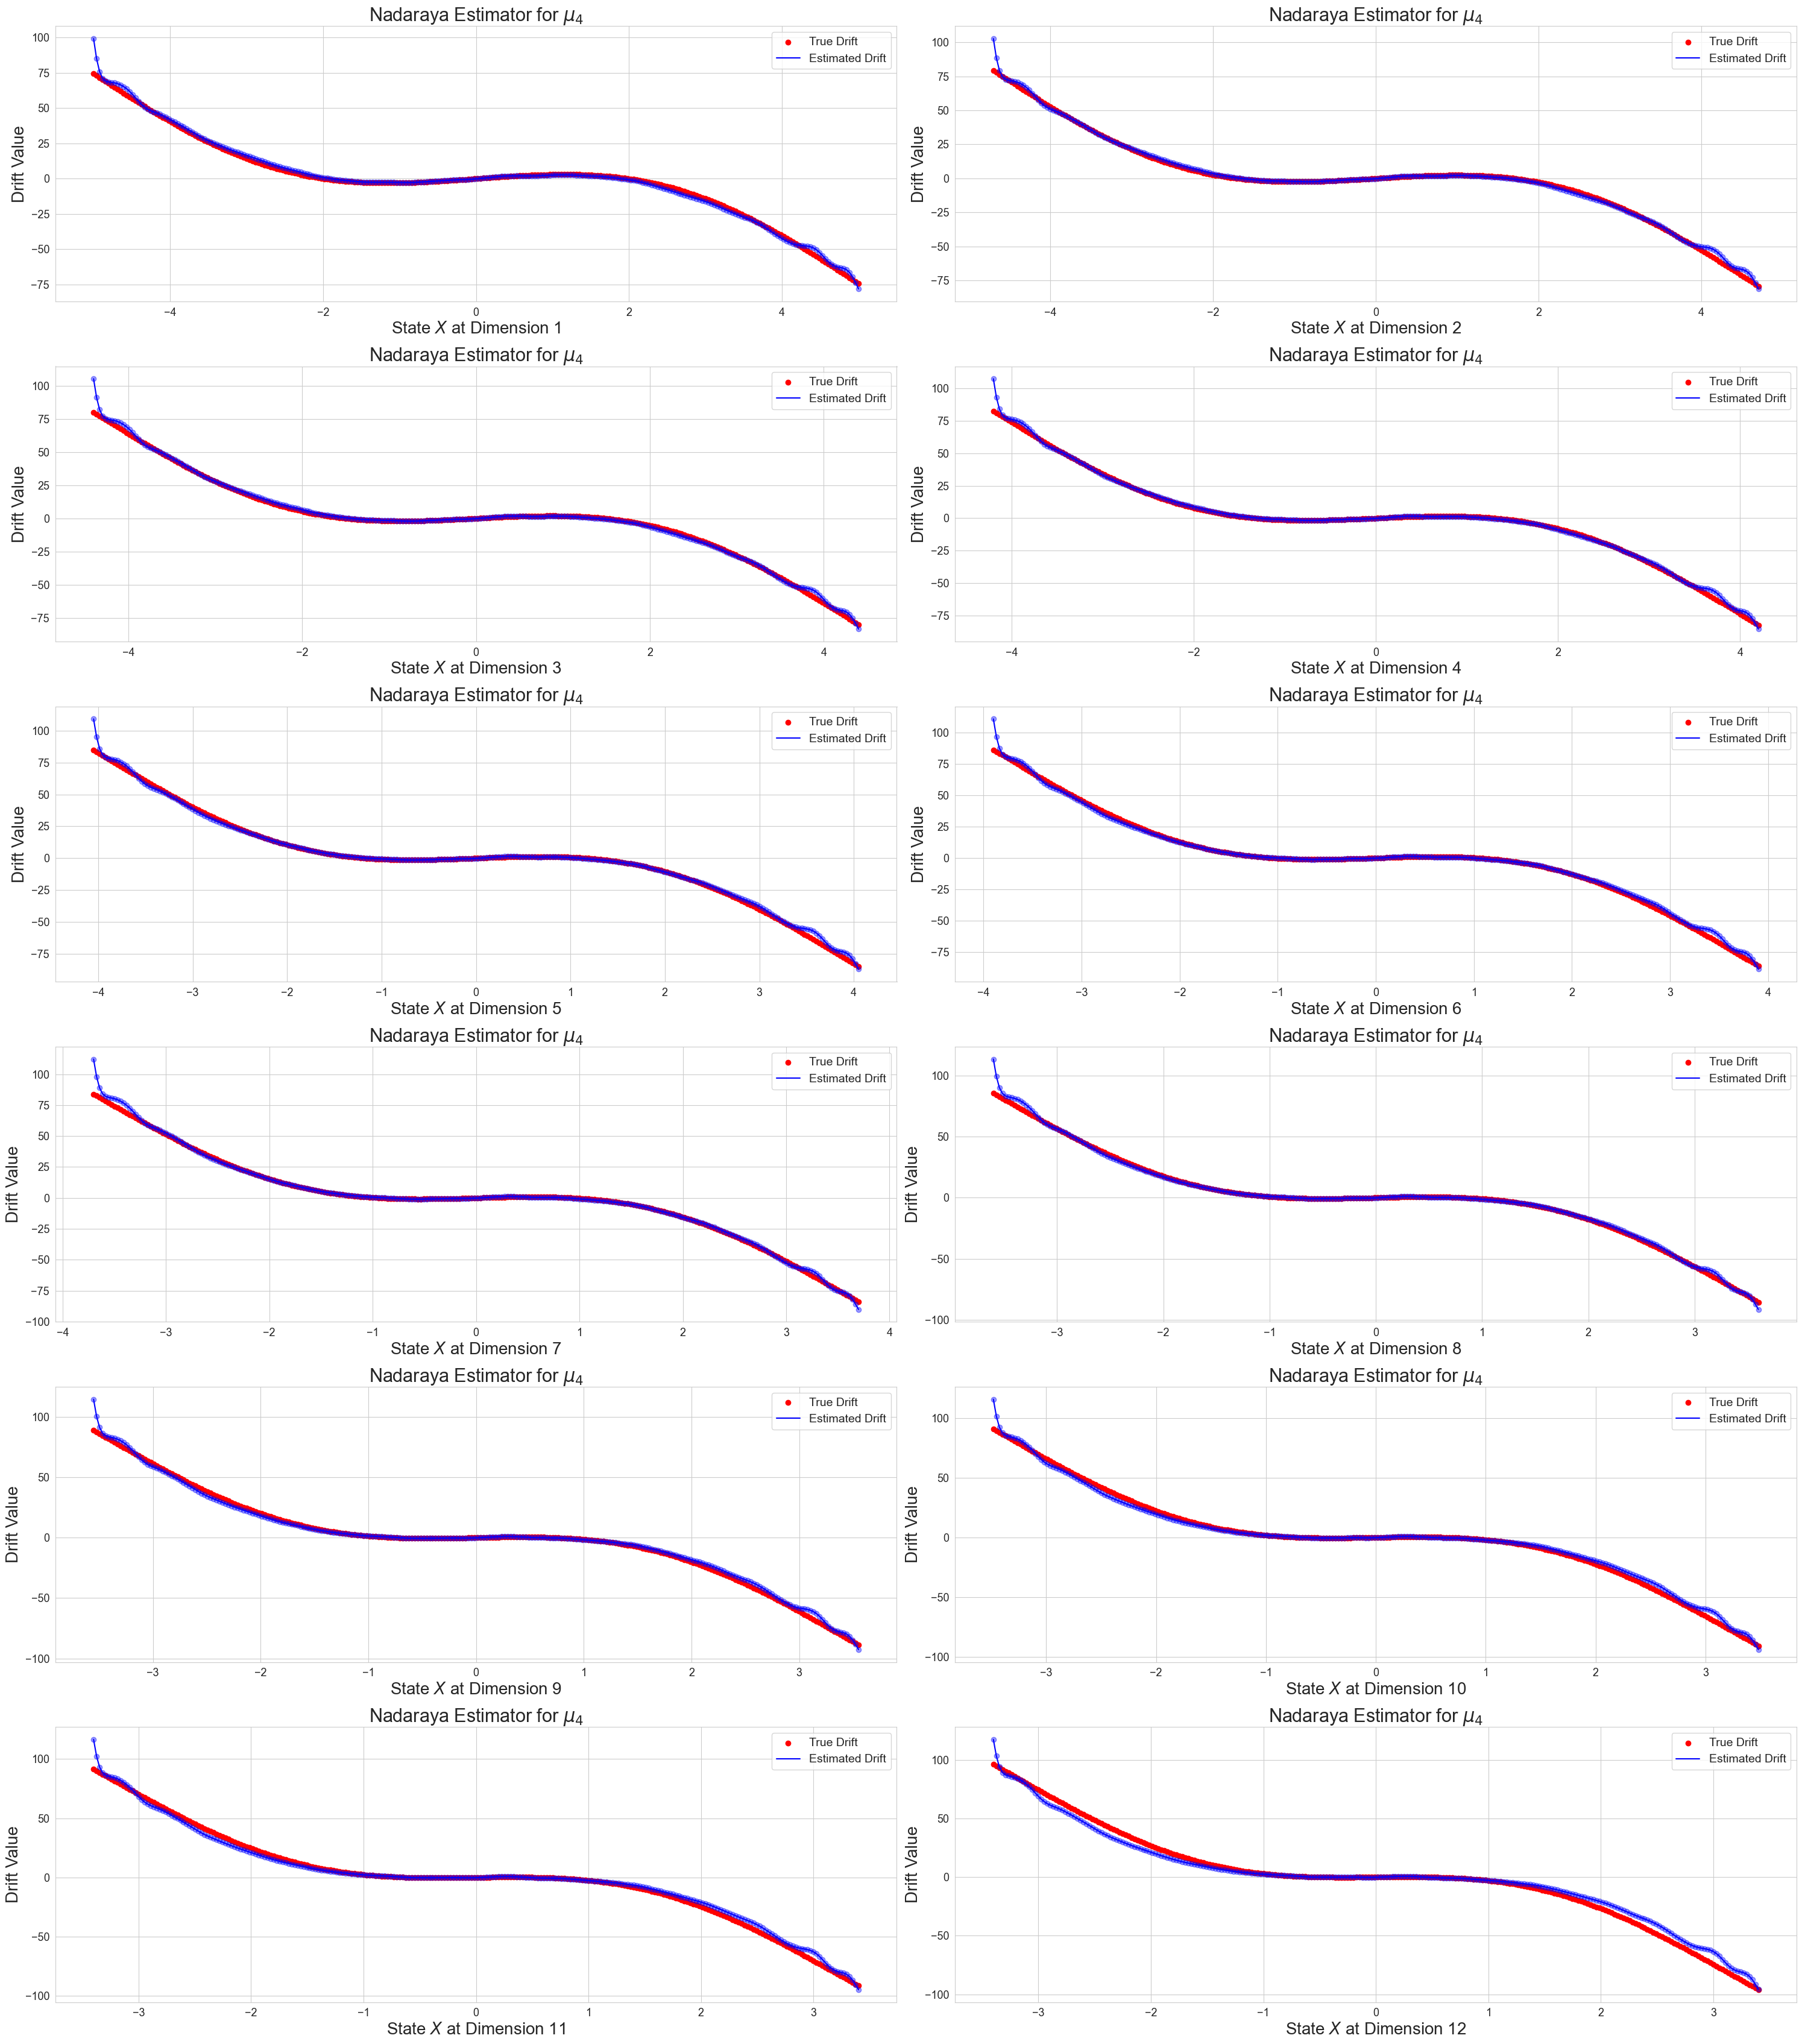

MSE  95.55648301691731 at BW 0.0352321 at BWIDX 0



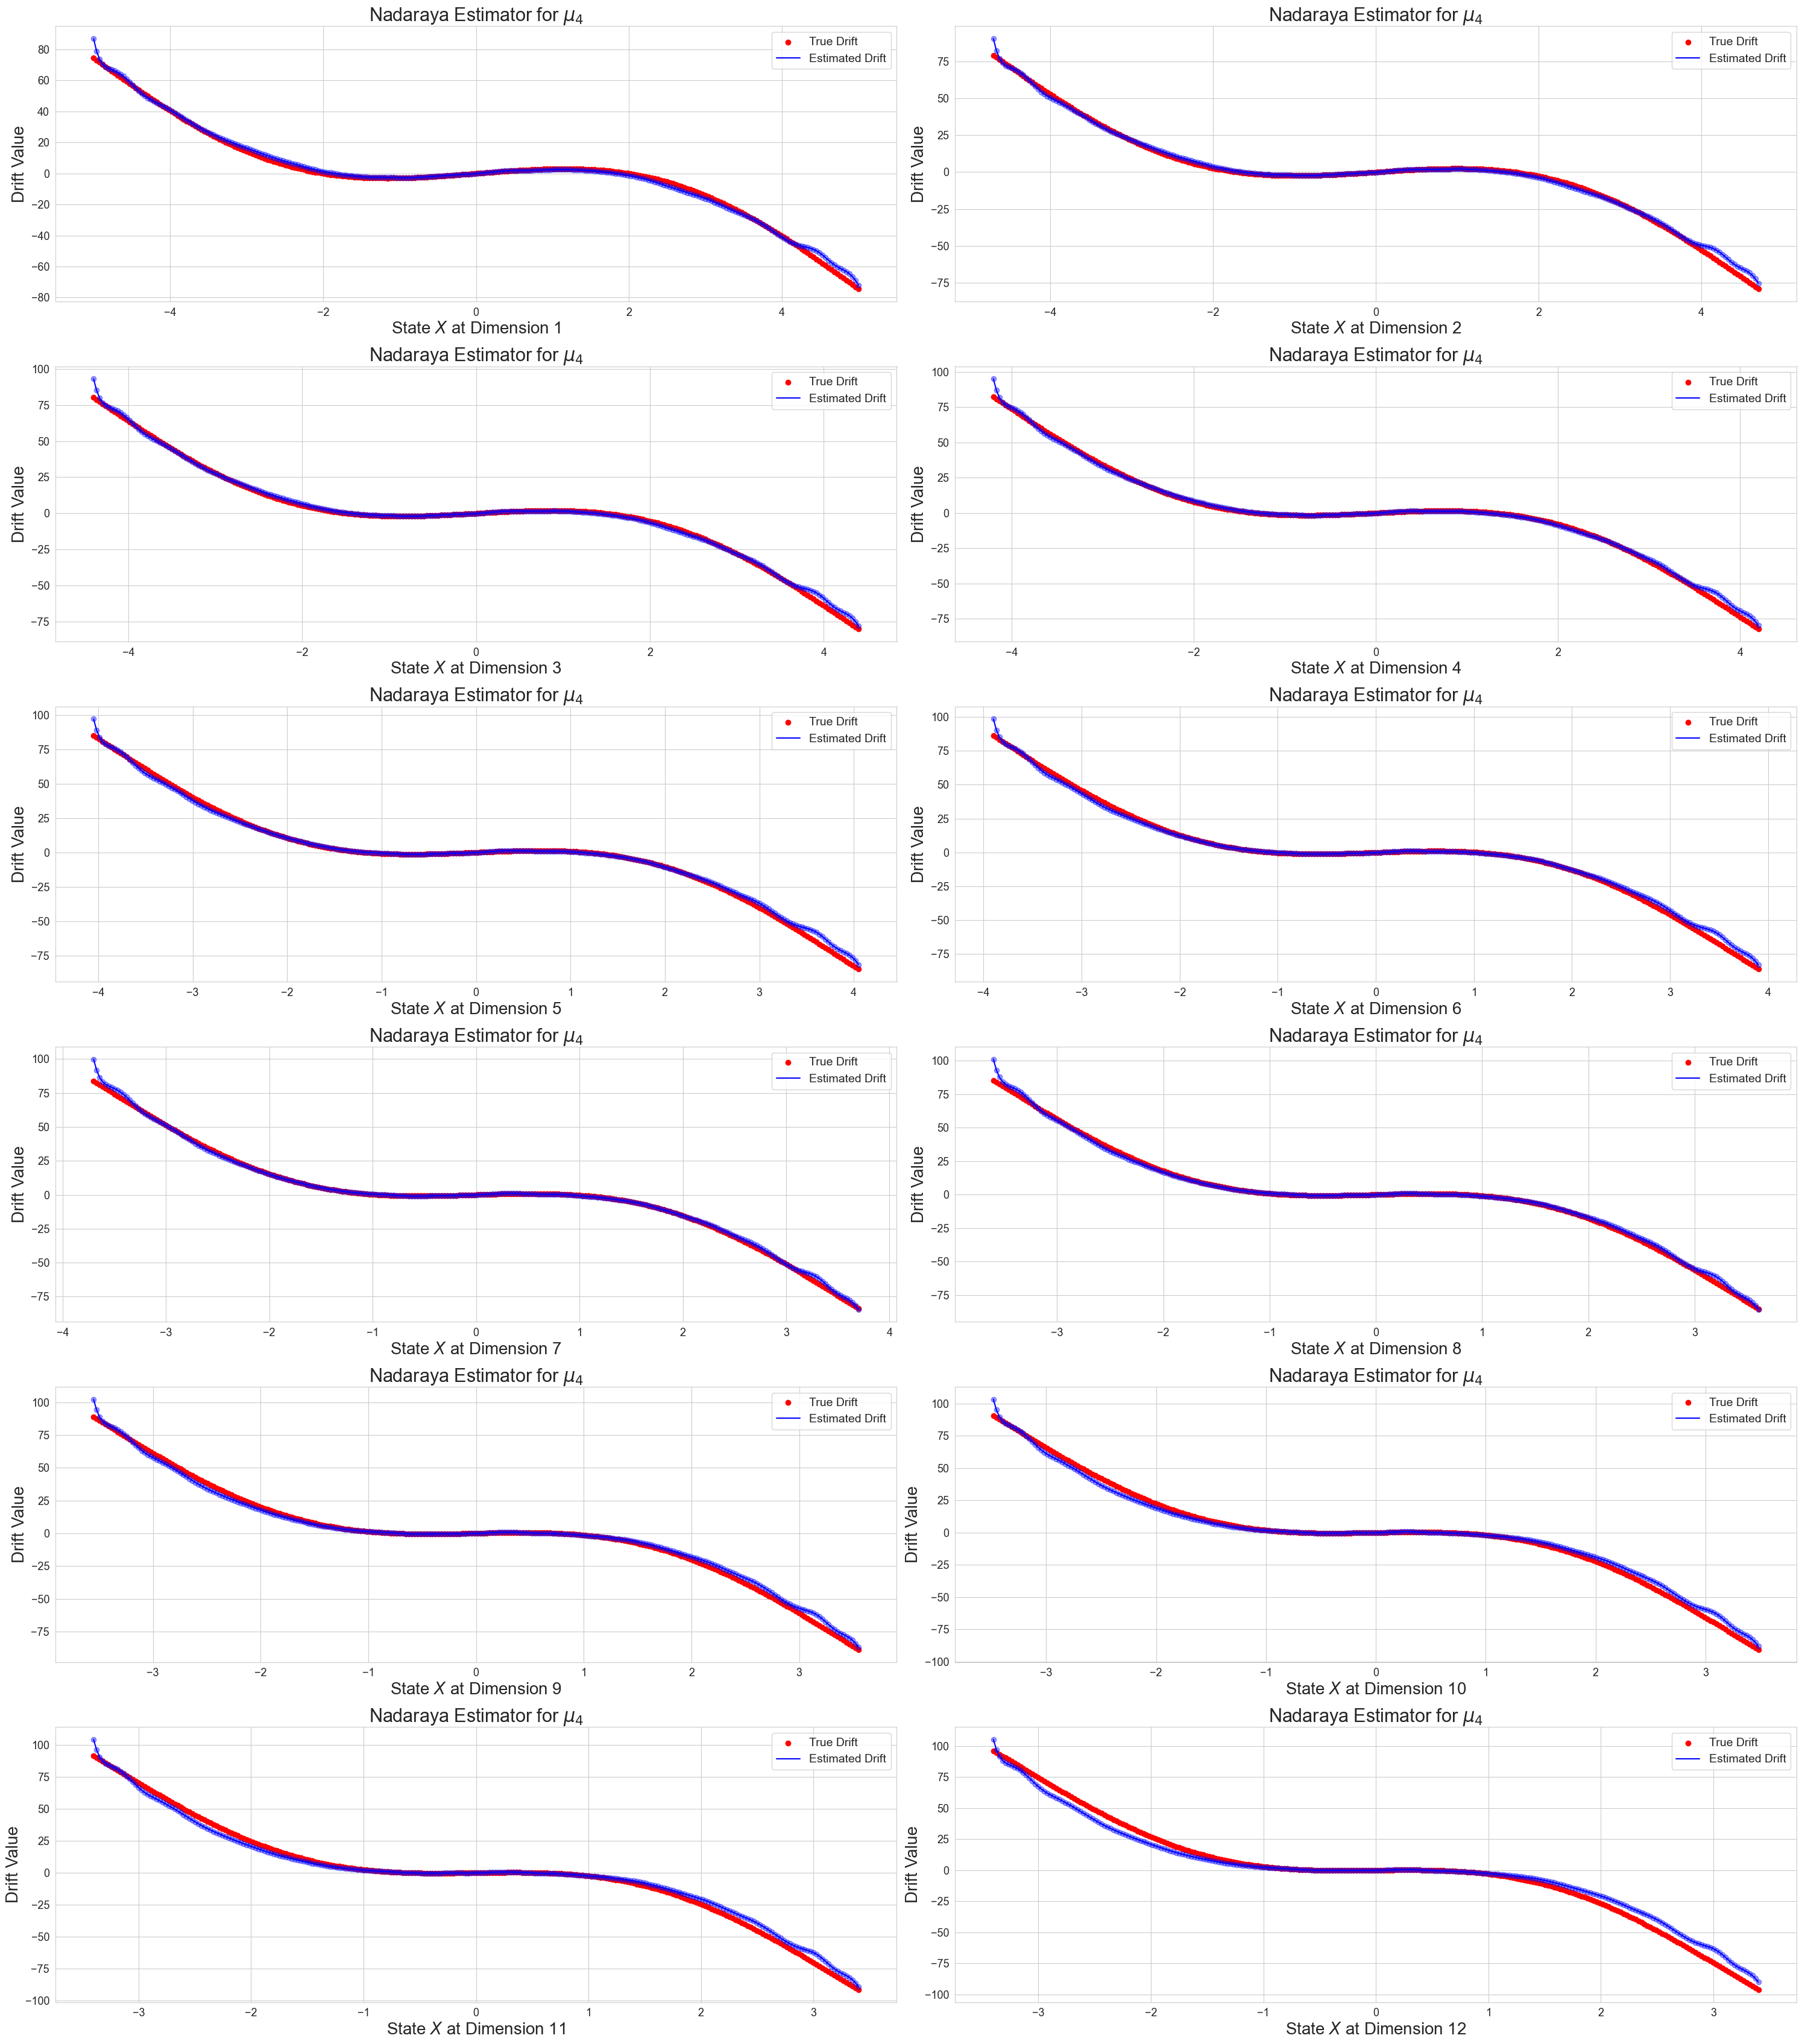

MSE  88.17019937614486 at BW 0.0424181 at BWIDX 1



ValueError: Cannot load file containing pickled data when allow_pickle=False

In [14]:
curr_best_mse = np.inf
toSave = True
Xshape = 256
bw_idx = 0
Xs = np.concatenate([np.linspace(-5, 5, num=Xshape).reshape(-1,1), np.linspace(-4.7, 4.7, num=Xshape).reshape(-1,1), \
                                     np.linspace(-4.4, 4.4, num=Xshape).reshape(-1,1), np.linspace(-4.2, 4.2, num=Xshape).reshape(-1,1), \
                                     np.linspace(-4.05, 4.05, num=Xshape).reshape(-1,1), np.linspace(-3.9, 3.9, num=Xshape).reshape(-1,1), \
                                     np.linspace(-3.7, 3.7, num=Xshape).reshape(-1,1), np.linspace(-3.6, 3.6, num=Xshape).reshape(-1,1), \
                                     np.linspace(-3.55, 3.55, num=Xshape).reshape(-1,1),
                                     np.linspace(-3.48, 3.48, num=Xshape).reshape(-1,1), \
                                     np.linspace(-3.4, 3.4, num=Xshape).reshape(-1,1), np.linspace(-3.4, 3.4, num=Xshape).reshape(-1,1)],
                                    axis=1)
is_true_drift = -(4. * np.array(config.quartic_coeff) * np.power(Xs,3) + 2. * np.array(
        config.quad_coeff) * Xs + np.array(config.const))
is_true_drift = is_true_drift/(1.+config.deltaT*np.abs(is_true_drift))
for file in zip(*[eval_exp_files, bws]):
    bw = file[-1]
    if bw < 0.03: continue
    try:
        f = np.load(file[0])
        is_drift = f.mean(axis=1)
        mse =  np.nanmean(np.sum((is_true_drift-is_drift)**2, axis=-1))
        if mse < curr_best_mse:
            mu_hats_minq = np.quantile(f, q=0.005, axis=1) # Lower bound
            mu_hats_maxq = np.quantile(f, q=0.995, axis=1) # uPPER bound
            plot_drift_estimator(mean=is_drift, mean_min=mu_hats_minq, mean_max=mu_hats_maxq, numpy_Xs=Xs, true_drift=is_true_drift, bw=bw)
            curr_best_mse = mse
            print(f"MSE  {mse} at BW {bw} at BWIDX {bw_idx}\n")
        bw_idx += 1
    except FileNotFoundError as e:
        continue